# Shell.AI Hackathon

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

seed = 42
np.random.seed(seed)

In [2]:
# Read datasets
dfbio = pd.read_csv('Shell.ai Hackathon 2023\dataset\Biomass_History.csv')
dfdist = pd.read_csv('Shell.ai Hackathon 2023\dataset\Distance_Matrix.csv')
submission = pd.read_csv('Shell.ai Hackathon 2023\dataset\sample_submission.csv')
dfext = pd.read_excel('Data\Temp.xlsx')

In [3]:
# Expand dfbio dataset
dfbio_long = pd.melt(dfbio, id_vars=['Index','Latitude','Longitude'], var_name='Year', value_name='Bio')
dfbio_long['Year'] = dfbio_long['Year'].astype(int)
dfbio_long['Bio'] = dfbio_long['Bio'].astype(float)

In [4]:
dfbio_mean = dfbio_long.groupby(by=['Index','Latitude','Longitude'])['Bio'].mean().reset_index()

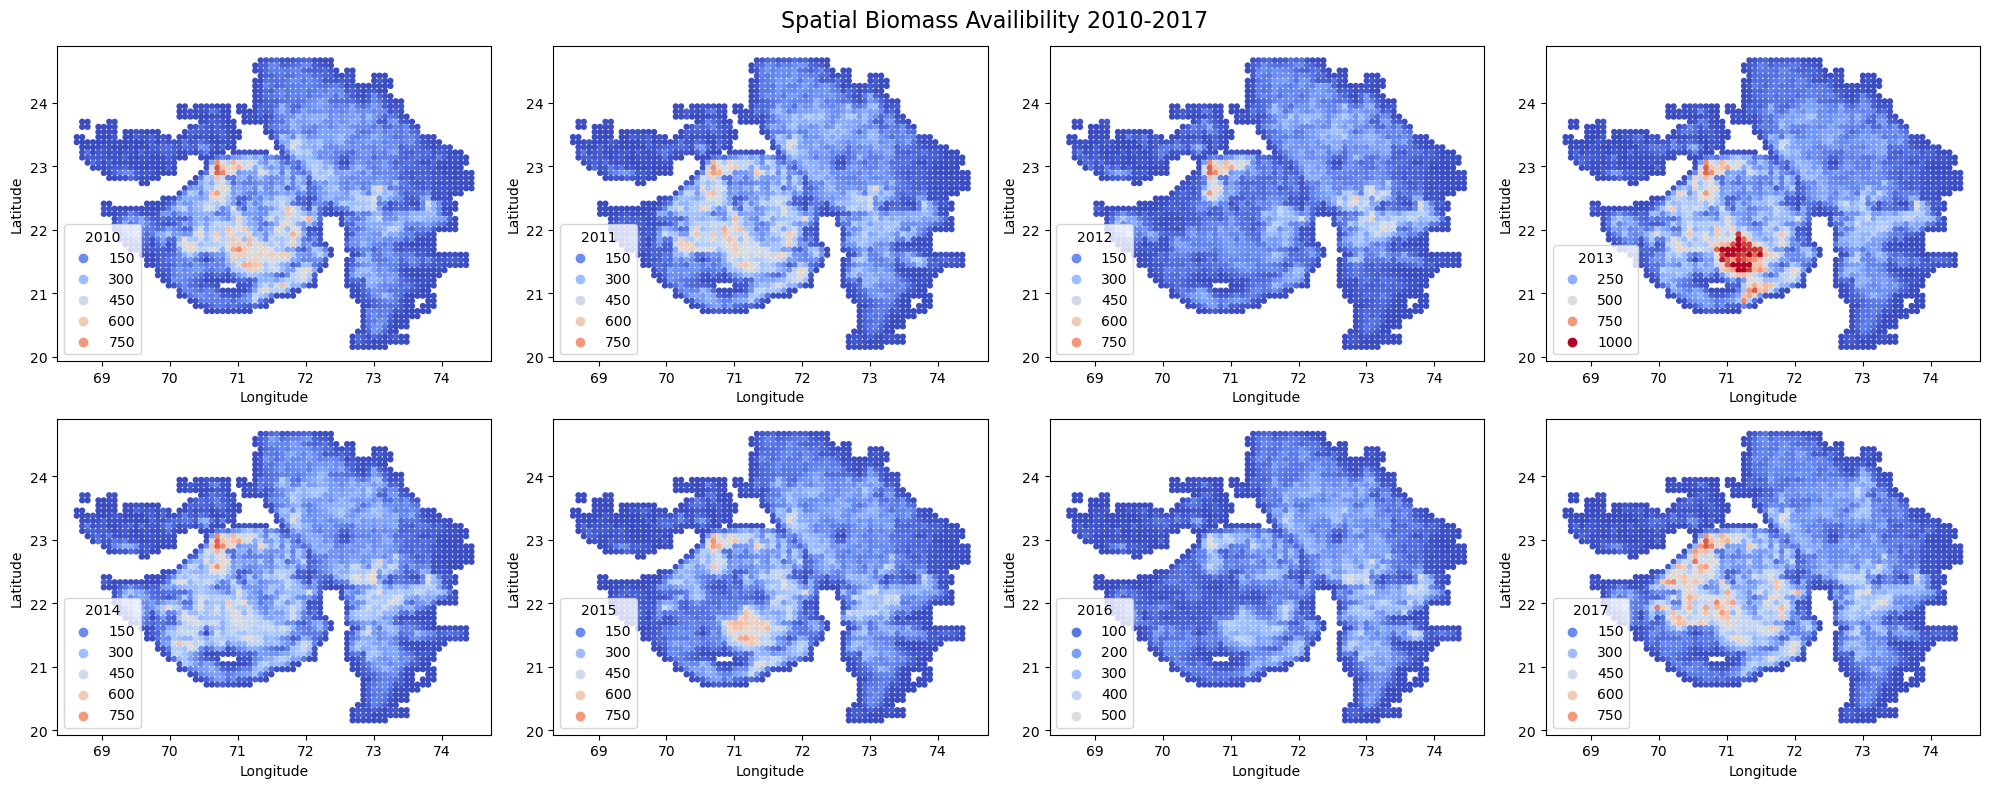

In [5]:
# Initial analysis
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

for i, ax in enumerate(axes.flatten()) :
    sns.scatterplot(data = dfbio, x='Longitude',y='Latitude', hue=str(2010+i), ax=ax, palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0)

fig.suptitle('Spatial Biomass Availibility 2010-2017', fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Aggregate external dataset
dfext_annual = dfext.groupby('Year').agg({
    "Avg_Temp" : "mean",
    "Min_Temp" : "min",
    "Max_Temp" : "max",
    "Rainfall" : "sum",
    "Rain_Days" : "sum",
    "Cloud" : "mean",
    "Humidity" : "mean",
    "Sun_Hours" : "sum",
    "Sun_Days" : "sum",
    "UV_Index" : "mean",
    "Pressure": "mean",
    "Avg_Gust": "mean",
    "Max_Wind": "max",
    "Avg_Wind": "mean",
}).reset_index()

In [7]:
annual_bio = dfbio_long.groupby('Year')['Bio'].sum().reset_index()
annual_sum = pd.merge(annual_bio, dfext_annual, on='Year', how='left')

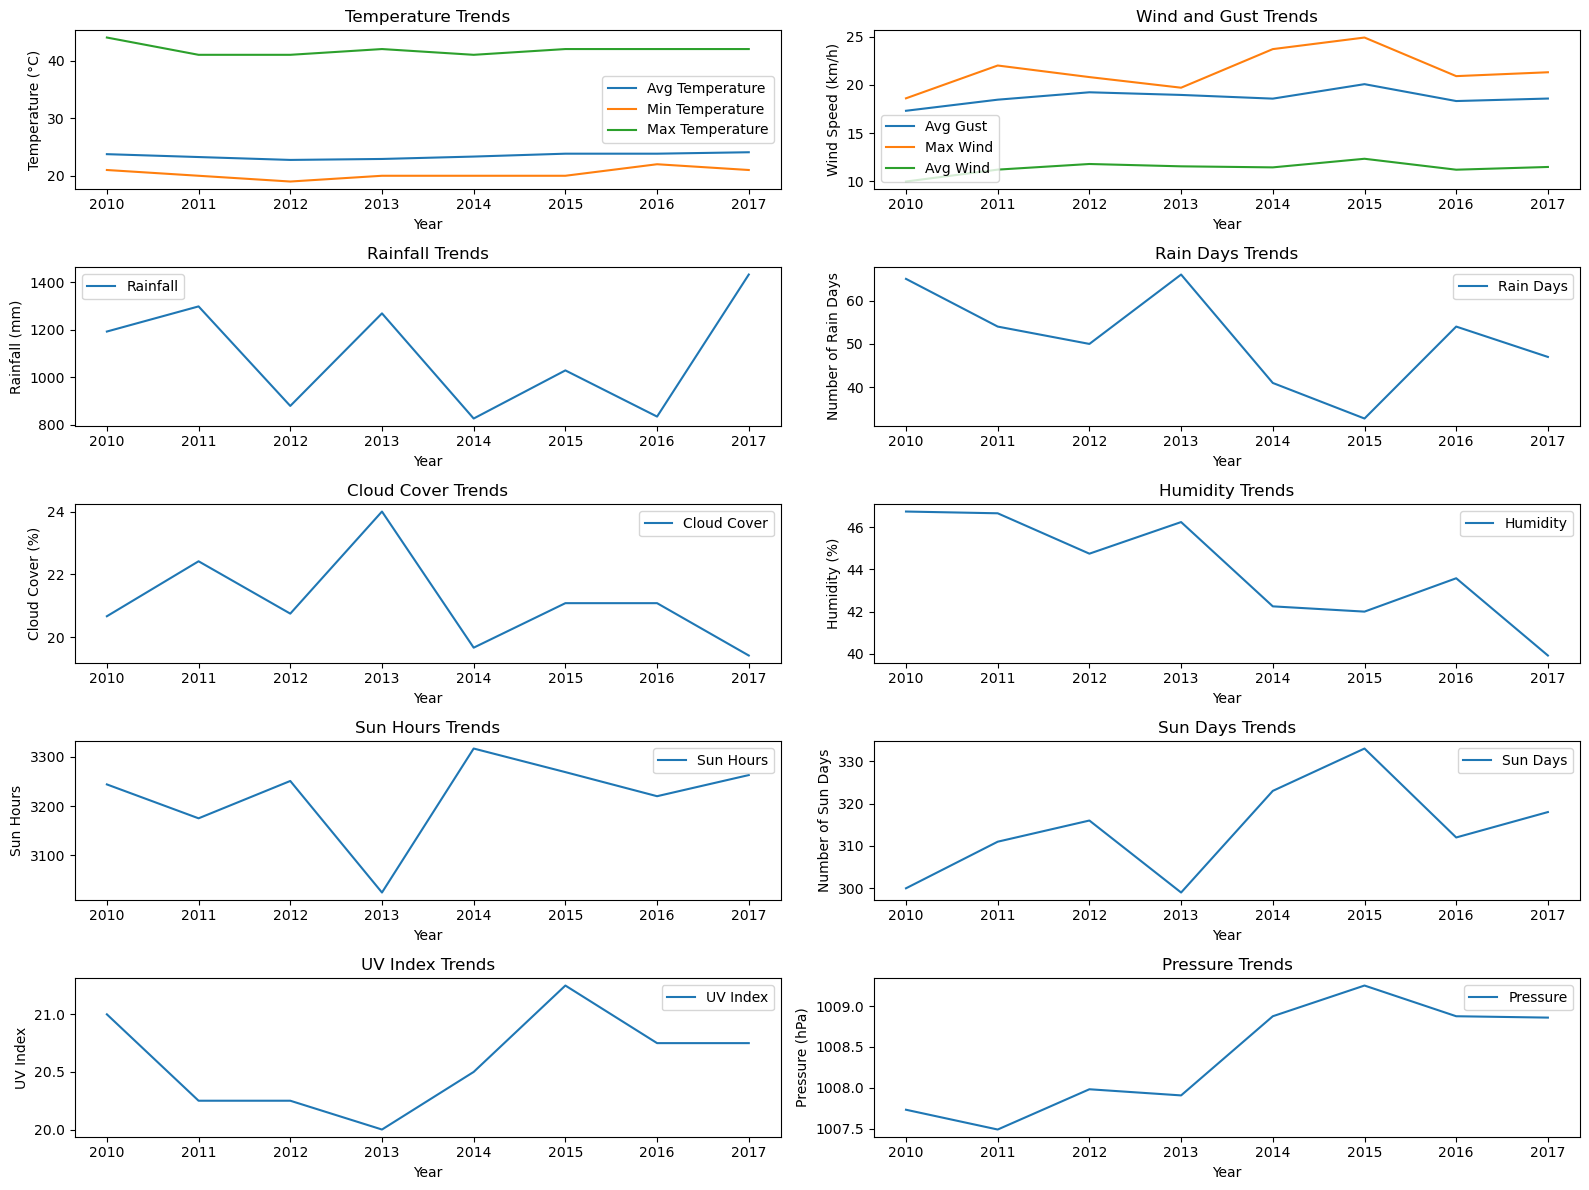

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 12))

# Temperature plots
sns.lineplot(data=annual_sum, x='Year', y='Avg_Temp', label='Avg Temperature', ax=axes[0, 0])
sns.lineplot(data=annual_sum, x='Year', y='Min_Temp', label='Min Temperature', ax=axes[0, 0])
sns.lineplot(data=annual_sum, x='Year', y='Max_Temp', label='Max Temperature', ax=axes[0, 0])
axes[0, 0].set_title('Temperature Trends')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].legend()

# Wind and Gust plots
sns.lineplot(data=annual_sum, x='Year', y='Avg_Gust', label='Avg Gust', ax=axes[0, 1])
sns.lineplot(data=annual_sum, x='Year', y='Max_Wind', label='Max Wind', ax=axes[0, 1])
sns.lineplot(data=annual_sum, x='Year', y='Avg_Wind', label='Avg Wind', ax=axes[0, 1])
axes[0, 1].set_title('Wind and Gust Trends')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Wind Speed (km/h)')
axes[0, 1].legend()

# Rainfall and Rain Days plots
sns.lineplot(data=annual_sum, x='Year', y='Rainfall', label='Rainfall', ax=axes[1, 0])
axes[1, 0].set_title('Rainfall Trends')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Rainfall (mm)')
axes[1, 0].legend()

sns.lineplot(data=annual_sum, x='Year', y='Rain_Days', label='Rain Days', ax=axes[1, 1])
axes[1, 1].set_title('Rain Days Trends')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Rain Days')
axes[1, 1].legend()

# Cloud and Humidity plots
sns.lineplot(data=annual_sum, x='Year', y='Cloud', label='Cloud Cover', ax=axes[2, 0])
axes[2, 0].set_title('Cloud Cover Trends')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Cloud Cover (%)')
axes[2, 0].legend()

sns.lineplot(data=annual_sum, x='Year', y='Humidity', label='Humidity', ax=axes[2, 1])
axes[2, 1].set_title('Humidity Trends')
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Humidity (%)')
axes[2, 1].legend()

# Sun Hours and Sun Days plots
sns.lineplot(data=annual_sum, x='Year', y='Sun_Hours', label='Sun Hours', ax=axes[3, 0])
axes[3, 0].set_title('Sun Hours Trends')
axes[3, 0].set_xlabel('Year')
axes[3, 0].set_ylabel('Sun Hours')
axes[3, 0].legend()

sns.lineplot(data=annual_sum, x='Year', y='Sun_Days', label='Sun Days', ax=axes[3, 1])
axes[3, 1].set_title('Sun Days Trends')
axes[3, 1].set_xlabel('Year')
axes[3, 1].set_ylabel('Number of Sun Days')
axes[3, 1].legend()

# UV Index and Pressure plots
sns.lineplot(data=annual_sum, x='Year', y='UV_Index', label='UV Index', ax=axes[4, 0])
axes[4, 0].set_title('UV Index Trends')
axes[4, 0].set_xlabel('Year')
axes[4, 0].set_ylabel('UV Index')
axes[4, 0].legend()

sns.lineplot(data=annual_sum, x='Year', y='Pressure', label='Pressure', ax=axes[4, 1])
axes[4, 1].set_title('Pressure Trends')
axes[4, 1].set_xlabel('Year')
axes[4, 1].set_ylabel('Pressure (hPa)')
axes[4, 1].legend()

# Adjust layout and spacing
plt.tight_layout()
plt.show()


In [9]:
# Create dataframe for timeseries clustering
dfts = dfbio.drop(columns=['Latitude','Longitude'])
year_cols = dfts.columns[1:]

In [10]:
# Create a normalized dataframe and expand
dfts_norm = dfts.copy()
dfts_norm[year_cols] = dfts_norm.apply(lambda row: (row[year_cols] - row[year_cols].min())/row[year_cols].max(), axis=1)
dfts_long = pd.melt(dfts_norm, id_vars=['Index'], var_name='Year', value_name='Bio')

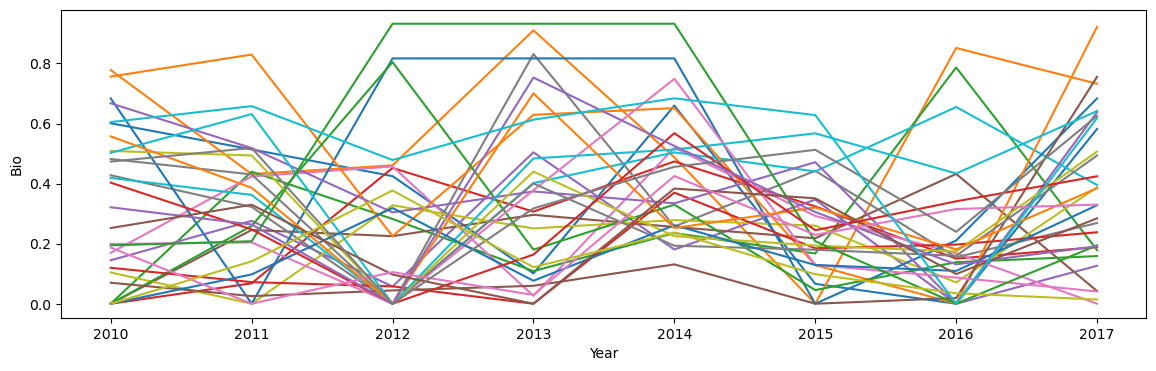

In [11]:
# Example of series
fig, axes = plt.subplots(figsize=(14,4))
for i in np.random.choice(dfts_long['Index'].unique(), size=30, replace=False) :
    sns.lineplot(data=dfts_long[dfts_long['Index']==i], x='Year', y='Bio', ax=axes)

In [12]:
from minisom import MiniSom
from collections import Counter
from sklearn.metrics import silhouette_score

In [45]:
# Initialize SOM for clustering
series_data = dfts_norm.drop(columns=['Index']).values

# som_x = som_y = int(np.ceil(np.sqrt(np.sqrt(len(dfts_norm)))))
som_x = som_y = 3

som = MiniSom(som_x, som_y, input_len=series_data.shape[1], random_seed=42)
som.random_weights_init(series_data)

num_epochs = 50000
som.train_random(series_data, num_epochs)

In [46]:
# Map the feature into data
winners = som.win_map(series_data)

In [47]:
def plot_cluster_average(x_grid, y_grid, win_map):
    fig, axs = plt.subplots(x_grid,y_grid,figsize=(15,20))
    fig.suptitle('Clusters')
    for x in range(x_grid):
        for y in range(y_grid):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*y_grid+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")
    
    plt.tight_layout()
    plt.show()

def plot_cluster_distribution(win_map):
    # Count the number of values for each key in the win_map dictionary
    key_value_counts = {key: len(values) for key, values in win_map.items()}

    # Convert the key-value counts into a Counter
    key_counts = Counter(key_value_counts)

    # Convert the Counter to a Pandas DataFrame
    import pandas as pd
    df = pd.DataFrame.from_dict(key_counts, orient='index', columns=['Count'])

    # Reset the index to make the keys a column
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Keys'}, inplace=True)

    # Create a bar plot using Seaborn
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Keys', y='Count', data=df)
    plt.xlabel('Keys')
    plt.ylabel('Number of Values')
    plt.title('Number of Values per Key')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def reindex(win_map):
    cluster_indices = list(win_map.keys())
    return {f"Cluster {i+1}": win_map[cluster_indices[i]] for i in range(len(cluster_indices))}

def eval_cluster(win_map):
    # Create an array to hold the data
    data = np.array([series for series_list in win_map.values() for series in series_list])

    # Create a list to hold the cluster labels for each data point
    cluster_labels = []
    for cluster, series_list in win_map.items():
        cluster_labels.extend([cluster] * len(series_list))

    # Convert the cluster labels list to a numpy array
    cluster_labels = np.array(cluster_labels)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)

    return silhouette_avg

In [48]:
# Reindex the label name
winners_indexed = reindex(winners)

In [49]:
# Calculate silhouette score
eval_cluster(winners_indexed)

0.2117822091617376

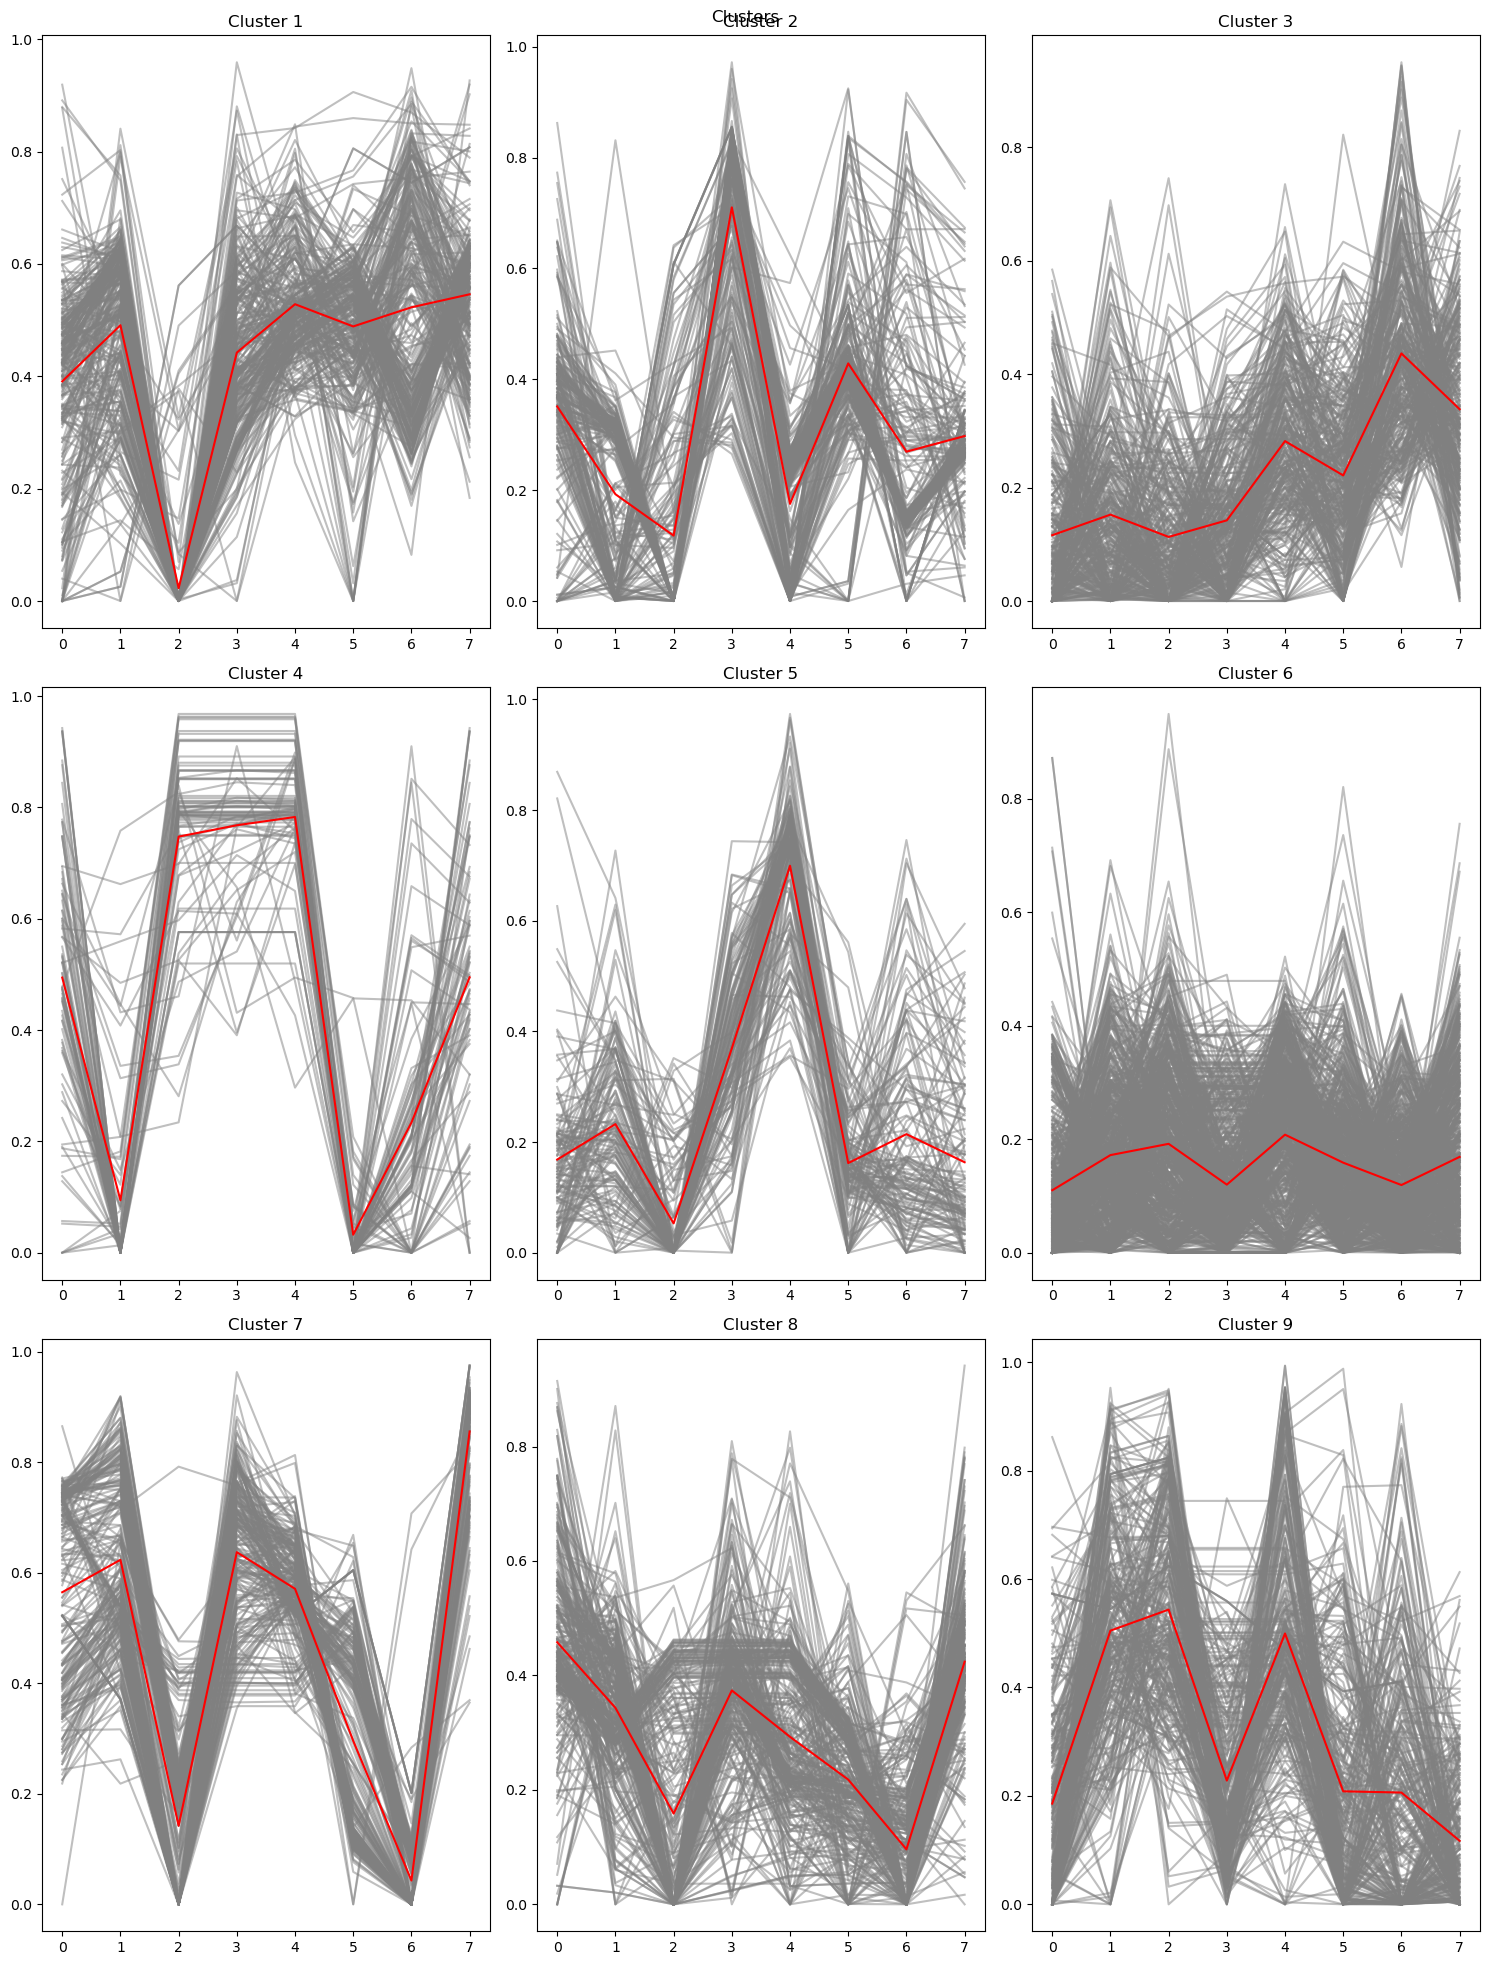

In [50]:
# Plot each cluster result
plot_cluster_average(som_x,som_y,winners)

In [52]:
# Create an empty DataFrame to store the flattened time series
columns = ['2010','2011','2012','2013','2014','2015','2016','2017','Label']
dflabel = pd.DataFrame(columns=columns)

# Iterate through each cluster and series in the winners_indexed dictionary
rows = []
for cluster, series_list in winners_indexed.items():
    for series in series_list:
        # Create a dictionary for each row
        new_row = {'2010': series[0], '2011': series[1], '2012': series[2],
                   '2013': series[3], '2014': series[4], '2015': series[5],
                   '2016': series[6], '2017': series[7], 'Label': cluster}
        rows.append(new_row)

# Concatenate all rows into the DataFrame
dflabel = pd.concat([dflabel, pd.DataFrame(rows)], ignore_index=True)
dflabel = dfts_norm.merge(dflabel, on=list(year_cols), how='left').drop(columns=list(year_cols))

In [53]:
dfsom = dfbio_mean.merge(dflabel, on="Index",how='left')

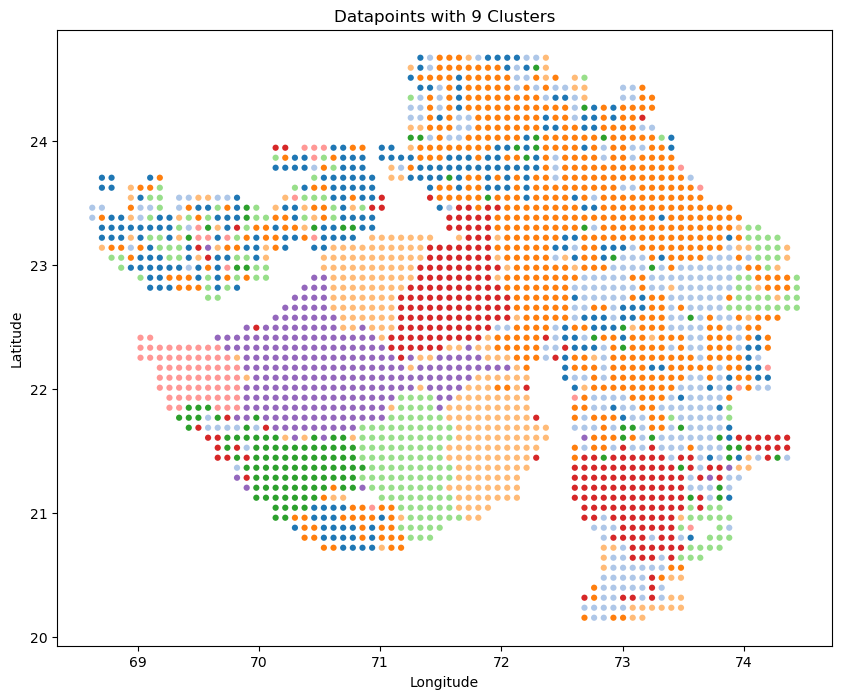

In [54]:
fig, axes = plt.subplots(figsize=(10,8))

n_colors = som_x*som_y
palette = sns.color_palette("tab20", n_colors=n_colors)
plot = sns.scatterplot(data=dfsom,x='Longitude',y='Latitude',hue='Label', palette=palette, s=20, linewidth=0,legend=False)

plt.title(f"Datapoints with {n_colors} Clusters")

plt.show()

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


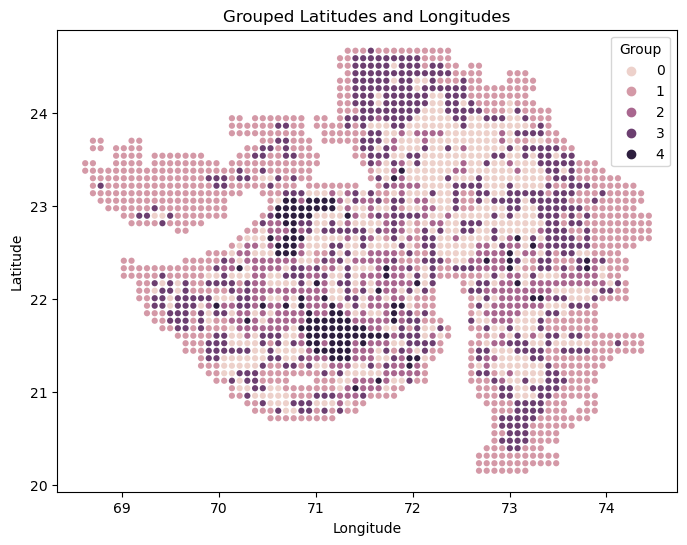

In [23]:
from sklearn.cluster import KMeans

dflatlon = dfbio_long.groupby(by=['Latitude', 'Longitude'])['Bio'].mean().reset_index()

model = KMeans(n_clusters=5, random_state=42)
model.fit(dflatlon)

yhat_train = model.predict(dflatlon)
dflatlon['Group'] = yhat_train

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dflatlon, x='Longitude', y='Latitude', hue='Group', s=20, linewidth=0)
plt.title('Grouped Latitudes and Longitudes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

dfgrouped = dfbio_long.merge(dflatlon[['Latitude', 'Longitude', 'Group']], on=['Latitude', 'Longitude'], how='left')

In [24]:
dfgrouped.groupby('Group')['Bio'].mean().sort_values(ascending=False)

Group
4    480.166716
2    311.149924
0    199.956957
3    113.691914
1     20.063979
Name: Bio, dtype: float64

In [25]:
dfgroup = dfgrouped.groupby('Index').mean().reset_index().drop(columns=['Latitude','Longitude','Year','Bio'])

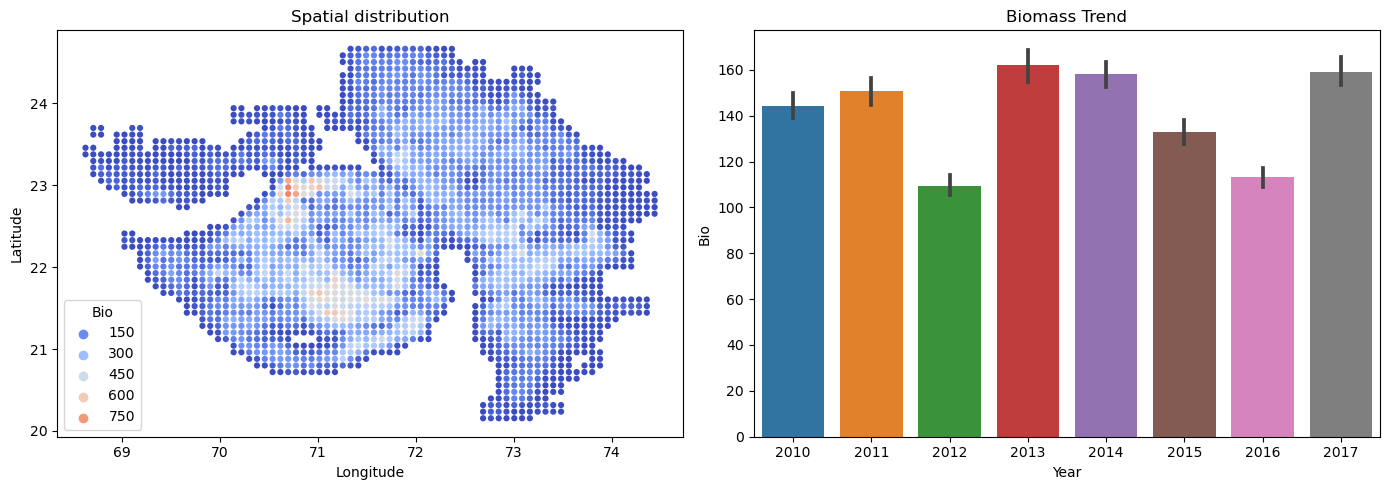

In [26]:
# Overall data observation
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.scatterplot(data=dfbio_mean,x='Longitude',y='Latitude',hue='Bio', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[0])
sns.barplot(data=dfbio_long,x='Year',y='Bio', ax=axes[1])
axes[0].set_title('Spatial distribution')
axes[1].set_title('Biomass Trend')
plt.tight_layout()
plt.show()

In [27]:
df_train = dfbio_long
df_2018 = dfbio_long.loc[dfbio_long['Year'] == 2010].drop(columns='Bio')
df_2018['Year'] = 2018
df_2019 = dfbio_long.loc[dfbio_long['Year'] == 2010].drop(columns='Bio')
df_2019['Year'] = 2019

In [28]:
def add_ext(df, df2018, df2019, dfext): #annual_dfext
    return pd.merge(df, dfext, on='Year', how='left'), pd.merge(df2018, dfext, on='Year', how='left'), pd.merge(df2019, dfext, on='Year', how='left')

def add_temp(df, df2018, df2019, past_count):
    for i in range(1,past_count+1):
        dflag=df.copy()[['Index','Year','Bio']]
        dflag['Year'] = dflag['Year']+i
        df = df.merge(dflag, on=['Index', 'Year'], how='left',suffixes=('',f'_plus{i}'))
        df2018 = df2018.merge(dflag, on=['Index', 'Year'], how='left',suffixes=('',f'_plus{i}'))
        df2019 = df2019.merge(dflag, on=['Index', 'Year'], how='left',suffixes=('',f'_plus{i}'))
        if i == 1 :
            df['Bio_plus'+str(i)].fillna(df['Bio'], inplace=True)
        else :
            df['Bio_plus'+str(i)].fillna(df['Bio_plus'+str(i-1)], inplace=True)
        
    df2018.rename(columns={'Bio': 'Bio_plus1'}, inplace=True)
    df2019.rename(columns={'Bio': 'Bio_plus1'}, inplace=True)
    
    return df, df2018, df2019

def add_group(df, df2018, df2019, group): #dfbio_mean
    df = pd.merge(df, group, on = 'Index', how='left')
    df2018 = pd.merge(df2018, group, on = 'Index', how='left')
    df2019 = pd.merge(df2019, group, on = 'Index', how='left')
    return pd.get_dummies(df, columns=['Group']), pd.get_dummies(df2018, columns=['Group']), pd.get_dummies(df2019, columns=['Group'])

def add_label(df, df2018, df2019, label, OHE=False): #dflabel
    df = pd.merge(df, label[['Index','Label']], on=['Index'], how='left')
    df2018 = pd.merge(df2018, label[['Index','Label']], on=['Index'], how='left')
    df2019 = pd.merge(df2019, label[['Index','Label']], on=['Index'], how='left')
    if OHE :
        return pd.get_dummies(df, columns=['Label']),pd.get_dummies(df2018, columns=['Label']),pd.get_dummies(df2019, columns=['Label'])
    else :
        return df, df2018, df2019

In [72]:
dftrain, dftest_2018, dftest_2019 = add_ext(df_train, df_2018, df_2019, dfext_annual)
dftrain, dftest_2018, dftest_2019 = add_label(dftrain, dftest_2018, dftest_2019, dflabel, OHE=True)
# dftrain, dftest_2018, dftest_2019 = add_group(df_train, df_2018, df_2019, dfgroup)
# dftrain, dftest_2018, dftest_2019 = add_temp(df_train, df_2018, df_2019, 1)

In [30]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# dftrain['Label'] = label_encoder.fit_transform(dftrain['Label'])

In [32]:
# Import machine learning frameworks
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
import optuna

In [77]:
def create_pipeline(model, scaler):
    pipeline = Pipeline([
        ('scaler', scaler),  # Standardize the features
        ('model', model)  # Your chosen model
    ])
    return pipeline

def model_eval(model, splits, dftrain):
    train_err = []
    valid_err = []

    X = dftrain.copy().drop(columns=['Index'])
    y = X.pop('Bio')

    tscv = TimeSeriesSplit(n_splits=splits, test_size=2418)

    for train_index, valid_index in tscv.split(X):
        valid_year = X.iloc[valid_index]['Year'].unique()[0]
        print(f"Testing on year : {valid_year}")

        x_train, y_train = X.iloc[train_index], y.iloc[train_index]
        x_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]

        pipeline = create_pipeline(model, MinMaxScaler())

        pipeline.fit(x_train, y_train)

        train_pred = pipeline.predict(x_train)
        valid_pred = pipeline.predict(x_valid)

        train_score = mean_absolute_error(y_train, train_pred)
        valid_score = mean_absolute_error(y_valid, valid_pred)

        train_err.append(train_score)
        valid_err.append(valid_score)

        print(f'Train Score {train_score:.5f}, Valid Score {valid_score:.5f}')

    print(f'Mean Train Score : {np.mean(train_err):.5f}, Mean Valid Score : {np.mean(valid_err):.5f}')

    return train_err, valid_err, pipeline


In [ ]:
def objective_seperate(trial):
    val = dftrain[dftrain['Year']==2017]  # Copy the dataframe to store predictions

    for cluster in dftrain['Label'].unique():
        X = dftrain[dftrain['Label'] == cluster]

        X_train = X[X['Year'] < 2017].drop(columns=['Bio', 'Index', 'Label','Latitude','Longitude'])
        y_train = X[X['Year'] < 2017]["Bio"].copy()
        X_val = X[X['Year'] >= 2017].drop(columns=['Bio', 'Index', 'Label','Latitude','Longitude'])
        y_val = X[X['Year'] >= 2017]["Bio"].copy()

        # model = LGBMRegressor(
        #     n_estimators=trial.suggest_int('n_estimators', 500, 6000, 25),
        #     max_depth=trial.suggest_int('max_depth', 5, 15),
        #     reg_alpha=trial.suggest_float('reg_alpha', 1e-4, 10, log=True),
        #     reg_lambda=trial.suggest_float('reg_lambda', 1e-4, 10, log=True),
        #     min_child_samples=trial.suggest_int('min_child_samples', 5, 100),
        #     subsample=trial.suggest_float('subsample', 0.5, 1.0),
        #     learning_rate=trial.suggest_float('learning_rate', 0.001, 0.1),
        #     colsample_bytree=trial.suggest_float('colsample_bytree', 0.2, 1.0),
        #     colsample_bynode=trial.suggest_float('colsample_bynode', 0.2, 1.0),
        #     random_state=seed,
        #     verbose=-1
        # )

        # model = CatBoostRegressor(
        #     n_estimators=trial.suggest_int('n_estimators', 500, 3000),
        #     max_depth=trial.suggest_int('max_depth', 5, 12),
        #     reg_lambda=trial.suggest_float('reg_lambda', 1e-4, 10, log=True),
        #     min_child_samples=trial.suggest_int('min_child_samples', 5, 100),
        #     subsample=trial.suggest_float('subsample', 0.4, 1.0),
        #     learning_rate=trial.suggest_float('learning_rate', 0.001, 0.1),
        #     colsample_bylevel=trial.suggest_float('colsample_bylevel', 0.2, 1.0),
        #     random_state=seed,
        #     silent=True
        # )

        model = XGBRegressor(
            n_estimators = trial.suggest_int("n_estimators", 500, 5000),
            max_depth = trial.suggest_int("max_depth", 5, 15),
            learning_rate = trial.suggest_float("learning_rate", 0.001, 0.1),
            subsample = trial.suggest_float("subsample", 0.5, 1.0),
            colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0),
            reg_alpha = trial.suggest_float("reg_alpha", 1e-4, 10),
            reg_lambda = trial.suggest_float("reg_lambda", 1e-4, 10),
            min_child_weight = trial.suggest_int('min_child_samples', 5, 100),
            verbosity=0,
            random_state=seed
        )

        pipeline = create_pipeline(model,MinMaxScaler())

        pipeline.fit(X_train, y_train)
        valid_pred = pipeline.predict(X_val)

        val.loc[val['Label'] == cluster, 'Bio'] = valid_pred

    overall_val_error = mean_absolute_error(val['Bio'], dftrain[dftrain['Year'] == 2017]['Bio'])
    return overall_val_error

In [ ]:
def objective_whole(trial):
    valid_err = []

    X = dftrain.copy().drop(columns=['Index','Latitude','Longitude'])
    y = X.pop('Bio')

    tscv = TimeSeriesSplit(n_splits=4, test_size=2418)

        x_train, y_train = X.iloc[train_index], y.iloc[train_index]
        x_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]

        model = LGBMRegressor(
            n_estimators=trial.suggest_int('n_estimators', 500, 6000, 25),
            max_depth=trial.suggest_int('max_depth', 5, 15),
            reg_alpha=trial.suggest_float('reg_alpha', 1e-4, 10, log=True),
            reg_lambda=trial.suggest_float('reg_lambda', 1e-4, 10, log=True),
            min_child_samples=trial.suggest_int('min_child_samples', 5, 100),
            subsample=trial.suggest_float('subsample', 0.5, 1.0),
            learning_rate=trial.suggest_float('learning_rate', 0.001, 0.1),
            colsample_bytree=trial.suggest_float('colsample_bytree', 0.2, 1.0),
            colsample_bynode=trial.suggest_float('colsample_bynode', 0.2, 1.0),
            random_state=seed,
            verbose=-1
        )

        pipeline = create_pipeline(model,MinMaxScaler())

        pipeline.fit(x_train, y_train)

        valid_pred = pipeline.predict(x_valid)

        valid_score = mean_absolute_error(y_valid, valid_pred)

        valid_err.append(valid_score)

    overall_val_error = np.mean(valid_err)

    return overall_val_error

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_whole, n_trials=200)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


In [ ]:
xgb_params = {
    'n_estimators': 1609,
    'max_depth': 11,
    'learning_rate': 0.04983295609304344,
    'subsample': 0.9099673893583715,
    'colsample_bytree': 0.853829751638616,
    'reg_alpha': 6.0051255269836155,
    'reg_lambda': 0.7933318866138406,
    'min_child_samples': 53
}

xgb_mae  = 46.54455150867385

lgbm_params = {
    'n_estimators': 1025,
    'max_depth': 6,
    'reg_alpha': 0.000544558953476737,
    'reg_lambda': 0.3931890673299353,
    'min_child_samples': 11,
    'subsample': 0.5735781314902697,
    'learning_rate': 0.050745298237446786,
    'colsample_bytree': 0.9439080413299346,
    'colsample_bynode': 0.9865287635141443
}

lgbm_mae  = 41.90325364504942

cb_params = {
    'iterations': 600,
    'depth': 8,
    'l2_leaf_reg': 0.3,
    'min_child_samples': 10,
    'subsample': 0.7,
    'learning_rate': 0.01,
    'colsample_bylevel': 0.9
}

In [ ]:
from sklearn.ensemble import VotingRegressor

xgb_weight = 1 / xgb_mae
lgbm_weight = 1 / lgbm_mae
xgb_weight_norm = xgb_weight / (xgb_weight+lgbm_weight)
lgbm_weight_norm = lgbm_weight / (xgb_weight+lgbm_weight)

xgb_model = XGBRegressor(**xgb_params, random_state=seed, verbosity=0)
lgbm_model = LGBMRegressor(**lgbm_params, random_seed=seed, verbose=-1)
xgb_pipeline = create_pipeline(xgb_model, MinMaxScaler())
lgbm_pipeline = create_pipeline(lgbm_model, MinMaxScaler())

ensemble = VotingRegressor(estimators=[
    ('xgb', xgb_pipeline),
    ('lgbm', lgbm_pipeline)
], weights=[xgb_weight_norm, lgbm_weight_norm])

In [ ]:
val = dftrain[dftrain['Year']==2017]

for cluster in dftrain['Label'].unique():
    print(cluster)
    X = dftrain[dftrain['Label'] == cluster]
    
    X_train = X[X['Year'] < 2017].drop(columns = ['Bio','Index','Label'])
    y_train = X[X['Year'] < 2017]["Bio"].copy()
    X_val = X[X['Year'] >= 2017].drop(columns = ['Bio','Index','Label'])
    y_val = X[X['Year'] >= 2017]["Bio"].copy()

    model = LGBMRegressor(**lgbm_params,random_seed=seed, verbose=-1)
    # model = CatBoostRegressor(**cb_params, random_seed=seed, silent=True)
    # model = XGBRegressor(random_state=seed, verbosity=0)

    pipeline = create_pipeline(model, MinMaxScaler())

    pipeline.fit(X_train, y_train)
    train_pred = pipeline.predict(X_train)
    valid_pred = pipeline.predict(X_val)
    print(f"train MAE of LGBM: {mean_absolute_error(train_pred, y_train)}")
    print(f"test MAE of LGBM: {mean_absolute_error(valid_pred, y_val)}")

    val.loc[val['Label'] == cluster, 'Bio'] = valid_pred

overall_val_error = mean_absolute_error(val['Bio'], dftrain[dftrain['Year']==2017]['Bio'])
print(f"Overall Valid MAE of LGBM: {overall_val_error}")

In [ ]:

# M = {
#     'Cluster 1' : 1,
#     'Cluster 2' : 1,
#     'Cluster 3' : 1,
#     'Cluster 4' : 1,
#     'Cluster 5' : 1,
#     'Cluster 6' : 1,
#     'Cluster 7' : 1,
#     'Cluster 8' : 1,
#     'Cluster 9' : 1,
#     # 'Cluster 10' : 1,
#     # 'Cluster 11' : 1,
#     # 'Cluster 12' : 1,
#     # 'Cluster 13' : 1,
#     # 'Cluster 14' : 1,
#     # 'Cluster 15' : 1,
#     # 'Cluster 16' : 1,
# }

train_err = []
for cluster in tqdm(dftrain['Label'].unique(), desc='Clusters'):
    X = dftrain[dftrain['Label'] == cluster]
    
    X_train = X.drop(columns = ['Bio','Index','Label'])
    y_train = X["Bio"].copy()
    if '2018' in dftest_2018.columns:
        X_test_2018 = dftest_2018[dftest_2018['Label'] == cluster].drop(columns = ['Index','Label','2018'])
    else :   
        X_test_2018 = dftest_2018[dftest_2018['Label'] == cluster].drop(columns = ['Index','Label'])

    pipeline.fit(X_train, y_train)
    
    train_pred = pipeline.predict(X_train)  # Predictions on the training set
    current_err = mean_absolute_error(train_pred, y_train)
    train_err.append(current_err)  # Append the MAE to the list

    pred_2018 = pipeline.predict(X_test_2018)
    pred_2018[pred_2018 < 0] = 0
    # dftest_2018.loc[dftest_2018['Label'] == cluster, '2018'] = (pred_2018*M[cluster]).round()
    dftest_2018.loc[dftest_2018['Label'] == cluster, '2018'] = (pred_2018).round()

    # dftest_2019.loc[dftest_2018['Label'] == cluster, 'Bio_plus1'] = dftest_2018['2018']

    if '2019' in dftest_2019.columns:
        X_test_2019 = dftest_2019[dftest_2019['Label'] == cluster].drop(columns = ['Index','Label','2019'])
    else :   
        X_test_2019 = dftest_2019[dftest_2019['Label'] == cluster].drop(columns = ['Index','Label'])

    pred_2019 = pipeline.predict(X_test_2019)
        
    pred_2019[pred_2019 < 0] = 0
    dftest_2019.loc[dftest_2019['Label'] == cluster, '2019'] = pred_2019.round()

print(np.mean(train_err))


In [ ]:
print(dftest_2018['2018'].sum(), dftest_2018['2018'].sum()*0.8, dftest_2018['2018'].mean())
print(dftest_2019['2019'].sum(), dftest_2019['2019'].sum()*0.8, dftest_2019['2019'].mean())

In [ ]:
# C9G5 L0
# lgbm_params = {
#     'n_estimators': 4625,
#     'max_depth': 9,
#     'reg_alpha': 0.08026409819769062,
#     'reg_lambda': 1.8467179373058205,
#     'min_child_samples': 7,
#     'subsample': 0.6573864089281499,
#     'learning_rate': 0.0351082336007069,
#     'colsample_bytree': 0.7444571595325646,
#     'colsample_bynode': 0.615119413399362
# }
# C9G3 L0
lgbm_params = {
    'n_estimators': 900,
    'max_depth': 9,
    'reg_alpha': 3.1392478980029788,
    'reg_lambda': 0.00010412479133585862,
    'min_child_samples': 14,
    'subsample': 0.5506502123653635,
    'learning_rate': 0.005468252519989124,
    'colsample_bytree': 0.48727523974438486,
    'colsample_bynode': 0.9835648899321278
}


In [ ]:
# C4 L0
lgbm_params = {
    'n_estimators': 4975,
    'max_depth': 13,
    'reg_alpha': 0.09354943631366626,
    'reg_lambda': 0.00040285521090290666,
    'min_child_samples': 8,
    'subsample': 0.7686301637122227,
    'learning_rate': 0.06670590483173147,
    'colsample_bytree': 0.8130849804770935,
    'colsample_bynode': 0.8247843973551353
}

In [ ]:
# C16 L0
lgbm_params = {
    'n_estimators': 4175,
    'max_depth': 11,
    'reg_alpha': 0.01264436709528729,
    'reg_lambda': 1.8929714451619355,
    'min_child_samples': 5,
    'subsample': 0.569276996901619,
    'learning_rate': 0.07298895968777419,
    'colsample_bytree': 0.8273176239401269,
    'colsample_bynode': 0.8415971786332357
}

In [ ]:
# C16 L3
lgbm_params = {
    'n_estimators': 575,
    'max_depth': 10,
    'reg_alpha': 0.9620256638620762,
    'reg_lambda': 0.00020924050137673675,
    'min_child_samples': 16,
    'subsample': 0.5302261561297474,
    'learning_rate': 0.008362420644519817,
    'colsample_bytree': 0.5585517221349294,
    'colsample_bynode': 0.9989195244686654
}

In [78]:
# C9 L0
lgbm_params = {
    'n_estimators': 3350,
    'max_depth': 10,
    'reg_alpha': 0.0011447555149746642,
    'reg_lambda': 0.017361034781609837,
    'min_child_samples': 7,
    'subsample': 0.8367885085400425,
    'learning_rate': 0.09255265307185188,
    'colsample_bytree': 0.80222005855108,
    'colsample_bynode': 0.7205940417894721
}

# lgbm_params = {
#     'n_estimators': 4075,
#     'max_depth': 15,
#     'reg_alpha': 0.09411945882996482,
#     'reg_lambda': 4.003524630313638,
#     'min_child_samples': 8,
#     'subsample': 0.9580469685011153,
#     'learning_rate': 0.05519608875918513,
#     'colsample_bytree': 0.9736997362126153,
#     'colsample_bynode': 0.9957607253700584
# }

In [79]:
model = LGBMRegressor(**lgbm_params, random_seed=seed, verbose=-1)

In [38]:
model = LGBMRegressor(random_seed=seed, verbose=-1)

In [80]:
pipeline = create_pipeline(model, MinMaxScaler())

In [ ]:
model = CatBoostRegressor(
    random_state=seed,
    silent=True
)

In [82]:
t_err, v_err, train_model = model_eval(model, 4, dftrain)

Testing on year : 2014
Train Score 10.22443, Valid Score 35.83349
Testing on year : 2015
Train Score 10.16883, Valid Score 39.60201
Testing on year : 2016
Train Score 10.46732, Valid Score 52.75652
Testing on year : 2017
Train Score 9.80726, Valid Score 45.82757
Mean Train Score : 10.16696, Mean Valid Score : 43.50490


In [ ]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [83]:
X = dftrain.copy().drop(columns=['Index'])
y = X.pop('Bio')

In [84]:
M = 0.925

pipeline.fit(X,y)

pred_2018 = pipeline.predict(dftest_2018.drop(columns=['Index']))
pred_2018[pred_2018 < 0] = 0
dftest_2018['2018'] = (pred_2018*M).round()

# dftest_2019['Bio_plus1'] = pred_2018.round()

pred_2019 = pipeline.predict(dftest_2019.drop(columns=['Index']))
pred_2019[pred_2019 < 0] = 0
dftest_2019['2019'] = pred_2019.round()

In [85]:
print(dftest_2018['2018'].sum(), dftest_2018['2018'].sum()*0.8, dftest_2018['2018'].mean())
print(dftest_2019['2019'].sum(), dftest_2019['2019'].sum()*0.8, dftest_2019['2019'].mean())

323720.0 258976.0 133.87923904052937
394282.0 315425.60000000003 163.0612076095947


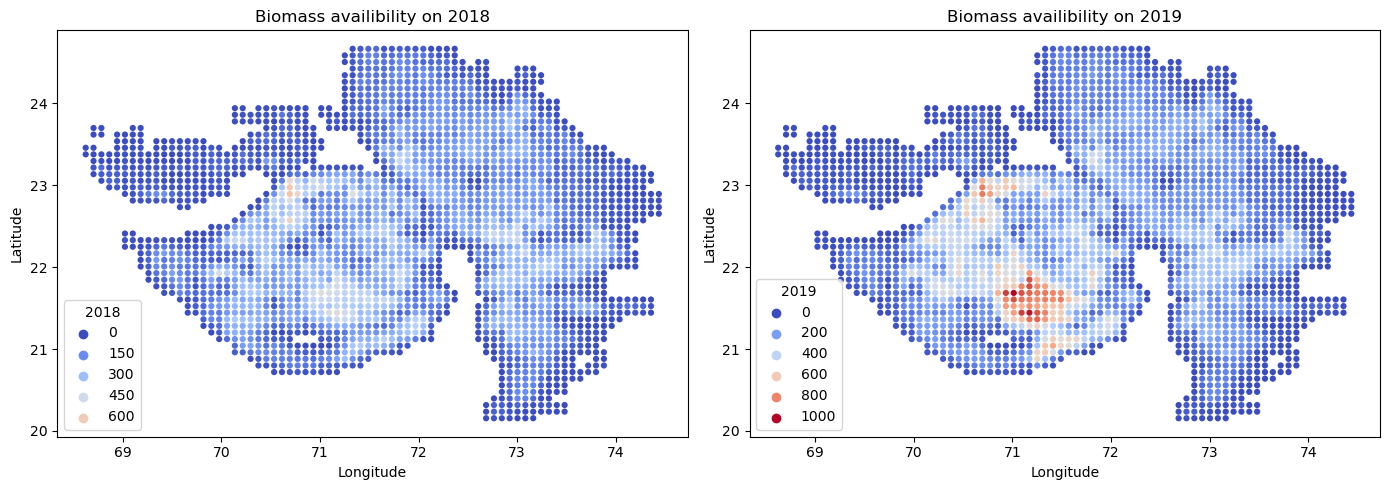

In [86]:
# Prediction results on year 2018 and year 2019
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.scatterplot(data=dftest_2018,x='Longitude',y='Latitude',hue='2018', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[0])
axes[0].set_title('Biomass availibility on 2018')
sns.scatterplot(data=dftest_2019,x='Longitude',y='Latitude',hue='2019', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[1])
axes[1].set_title('Biomass availibility on 2019')

plt.tight_layout()
plt.show()

In [ ]:
# dftest_2019['2019'] = dftest_2018['2018']

In [87]:
dfpred_2018 = dftest_2018[['Index','Latitude','Longitude','2018']]
dfpred_2019 = dftest_2019[['Index','Latitude','Longitude','2019']]
dfcluster = dfpred_2018.merge(dfpred_2019, on =['Index','Latitude','Longitude'])

dfcluster.head(5)

Index  Latitude  Longitude  2018  2019
0      0  24.66818   71.33144   5.0  10.0
1      1  24.66818   71.41106  32.0  36.0
2      2  24.66818   71.49069  61.0  63.0
3      3  24.66818   71.57031  71.0  79.0
4      4  24.66818   71.64994  18.0  22.0

In [88]:
dfcluster['2018'].mean(), dfcluster['2018'].sum()

(133.87923904052937, 323720.0)

## Stage-1

In [89]:
from pulp import *
from ortools.linear_solver import pywraplp

In [101]:
def assign_greedy(maxval_index, dfcluster, avail, used, cap):
    group_assign = []
    total_transport = 0
    group_assign.append(maxval_index)
    distances = dfdist[str(maxval_index)].copy()/((avail['2018']+avail['2019'])/2)
    
    while True :
        distances.loc[used+group_assign] = np.nan
        closest = np.nanargmin(distances.tolist())
        dist = dfdist[str(closest)][maxval_index]

        current_biomass = (dfcluster[dfcluster['Index'].isin(group_assign)]['2018'].sum(), dfcluster[dfcluster['Index'].isin(group_assign)]['2019'].sum())
        add_biomass = (dfcluster[dfcluster['Index']==closest]['2018'].values[0], dfcluster[dfcluster['Index']==closest]['2019'].values[0])
        if (current_biomass[0] + add_biomass[0] > cap) or (current_biomass[1] + add_biomass[1] > cap) :
            break

        group_assign.append(closest)
        total_transport += dist*add_biomass[0] + dist*add_biomass[1]
    
    return maxval_index, group_assign, total_transport, current_biomass
    

In [ ]:
def assign_mip_single(maxval_index, dfcluster, avail, used, cap):

    Sites = avail['Index'].tolist()
    Depots = [maxval_index]
    Years = ['2018','2019']
    Biomass = avail.copy()

    prob = LpProblem("Stage-1_Single", LpMinimize)

    # use_depot will be 1 if depot j is opened and 0 if not for every location
    use_depot = LpVariable.dicts("Use Depot", Depots, 0, 1, LpBinary)
    # assign_refinery will be 1 if site i is collected by depot j at year y
    assign_depot = LpVariable.dicts("Assign Depot", [(i,j,y) for i in Sites for j in Depots for y in Years], 0, 1, LpBinary)

    # Define transport objective function
    trans_cost = lpSum(
        lpSum(
            dfdist[str(j)][int(i)]*(Biomass[y][i])*assign_depot[i,j,y] for i in Sites for j in Depots
            ) for y in Years
        )
    # Define underutilization objective function
    under_cost = lpSum(
        lpSum(
            cap*use_depot[j] - lpSum(
                (Biomass[y][i])*assign_depot[i,j,y] for i in Sites
                ) for j in Depots
            ) for y in Years
        )
    # Define overall costs
    prob += trans_cost*0.01 + under_cost

    # Biomass collected cant exceed annual depot capacity
    for y in Years :
        for j in Depots :
            prob += lpSum(Biomass[y][i]*assign_depot[i,j,y] for i in Sites) - cap*use_depot[j] <= 0
            prob += lpSum(Biomass[y][i]*assign_depot[i,j,y] for i in Sites) >= 18000

    # Each site can only be collected by at most one depot per year
    for y in Years :
        for i in Sites :
            prob += lpSum(assign_depot[i,j,y] for j in Depots) <= 1

    # Each site can only be collected by an opened depot
    for y in Years :
        for i in Sites :
            for j in Depots :
                prob += assign_depot[i,j,y] <= use_depot[j]

    # Each depot assignment is the same across every year
    for i in Sites :
        for j in Depots :
            assignment_sum = lpSum(assign_depot[i,j,y] for y in Years)
            prob += assignment_sum == len(Years) * assign_depot[(i, j, Years[0])]

    prob += lpSum(use_depot.values()) == 1

    prob.solve()
    print(f'objective costs : {prob.objective.value()}')

    total_transport = trans_cost.value()

    group_assign = []
    for v in prob.variables():
        if v.varValue > 0:
            line = v.name
            if line.startswith('Assign_Depot_'):
                key = int(line.split(',_')[1])
                value = int(line.split(',_')[0].split('(')[1])
                if line.split(',_')[2].split("'")[1] == '2018': 
                    group_assign.append(value)
            else :
                center = int(line.split('_')[2])

    current_biomass = (dfcluster[dfcluster['Index'].isin(group_assign)]['2018'].sum(),dfcluster[dfcluster['Index'].isin(group_assign)]['2019'].sum())

    return center,group_assign, total_transport, current_biomass
    

In [102]:
def stage1(dfcluster, cap, used, centers, method='greedy') :
    group_dict = {}
    annual_collected = (0,0)
    annual_threshold = (dfcluster['2018'].sum()*0.8, dfcluster['2019'].sum()*0.8)

    while (annual_collected[0]<annual_threshold[0]) or (annual_collected[1]<annual_threshold[1]) :
        avail = dfcluster[~dfcluster['Index'].isin(used)]
        maxval_index = ((avail['2018']+avail['2019'])/2).idxmax()
        centers.append(maxval_index)

        if method == 'greedy' :
            center, group_assign, total_dist, current_biomass = assign_greedy(maxval_index=maxval_index, dfcluster=dfcluster, avail=avail, used=used, cap=cap)
        if method == 'mip_single' :
            center, group_assign, total_dist, current_biomass = assign_mip_single(maxval_index=maxval_index, dfcluster=dfcluster, avail=avail, used=used, cap=cap)

        used += group_assign
        group_dict[maxval_index] =  {'points': group_assign, 'transport': total_dist, 'biomass': current_biomass}

        annual_collected = (dfcluster[dfcluster['Index'].isin(used)]['2018'].sum(), dfcluster[dfcluster['Index'].isin(used)]['2019'].sum())
        print(f'Total biomass : {annual_collected}')
    
    return used, centers, group_dict


In [99]:
used = []
group_dict = {}
costs = []

used_2019 = [] 
group_dict_2019 = {}
costs_2019 = []

In [ ]:
for iter_index in tqdm(range(9), desc='Optimize'):
    print(f'Iter no: {iter_index+1}')
    avail = dfcluster[~dfcluster['Index'].isin(used)]
    max_iter = 5
    maxval_index = avail['2018'].nlargest(max_iter).index.tolist()
    Sites = avail['Index'].tolist()
    Depots = maxval_index
    Biomass = avail.copy()['2018']
    cap = 20000

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        raise Exception("Solver initialization failed")

    use_depot = {}
    assign_depot = {}

    for j in Depots:
        use_depot[j] = solver.BoolVar(f"Use Depot {j}")

    for i in Sites:
        for j in Depots:
            assign_depot[(i, j)] = solver.BoolVar(f"Assign Depot {i},{j}")

    trans_cost = solver.Sum(
        dfdist[str(j)][int(i)] * Biomass[i] * assign_depot[i, j]
        for i in Sites for j in Depots
    )

    under_cost = solver.Sum(
        cap * use_depot[j] - solver.Sum(
            Biomass[i] * assign_depot[i, j] for i in Sites
        ) for j in Depots
    )

    # Combine transportation cost and fixed cost for the total cost
    total_cost = trans_cost*0.001 + under_cost
    solver.Minimize(total_cost)

    solver.Add(solver.Sum(use_depot[j] for j in Depots) == 1)

    for i in Sites:
        for j in Depots:
            solver.Add(assign_depot[i, j] <= use_depot[j])

    for j in Depots:
        solver.Add(solver.Sum(Biomass[i] * assign_depot[i, j] for i in Sites) - cap * use_depot[j] <= 0)
        solver.Add(solver.Sum(Biomass[i] * assign_depot[i, j] for i in Sites) - 0.9 * cap * use_depot[j] >= 0)

    for i in Sites:
        solver.Add(solver.Sum(assign_depot[i, j] for j in Depots) <= 1)

    status = solver.Solve()
    
    losses = (total_cost.solution_value(), trans_cost.solution_value(), under_cost.solution_value())
    costs.append(losses)

    print(total_cost.solution_value())

    variable_values = {
        var.name(): var.solution_value() for var in [use_depot[j] for j in Depots] +
        [assign_depot[i, j] for i in Sites for j in Depots]
    }

    group_assign_dict = {}
    centers = []
    for var_name, var_value in variable_values.items():
        if var_value > 0 :
            line = var_name
            if line.startswith('Assign Depot'):
                key = int(line.split(',')[1])
                value = int(line.split(',')[0].split(' ')[2])
                if key in group_assign_dict:
                    group_assign_dict[key].append(value)
                else:
                    group_assign_dict[key] = [value]
            else :
                centers.append(int(line.split(' ')[2]))

    for value_list in group_assign_dict.values():
        used.extend(value_list)

    group_dict.update(group_assign_dict)

In [ ]:
for iter_index in tqdm(range(2), desc='Optimize'):
    print(f'Iter no: {iter_index+1}')
    avail = dfcluster[~dfcluster['Index'].isin(used)]
    max_iter = 30
    maxval_index = avail['2018'].nlargest(max_iter).index.tolist()
    Sites = avail['Index'].tolist()
    Depots = maxval_index
    Biomass = avail.copy()['2018']
    cap = 20000

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        raise Exception("Solver initialization failed")

    use_depot = {}
    assign_depot = {}

    for j in Depots:
        use_depot[j] = solver.BoolVar(f"Use Depot {j}")

    for i in Sites:
        for j in Depots:
            assign_depot[(i, j)] = solver.BoolVar(f"Assign Depot {i},{j}")

    trans_cost = solver.Sum(
        dfdist[str(j)][int(i)] * Biomass[i] * assign_depot[i, j]
        for i in Sites for j in Depots
    )

    under_cost = solver.Sum(
        cap * use_depot[j] - solver.Sum(
            Biomass[i] * assign_depot[i, j] for i in Sites
        ) for j in Depots
    )

    # Combine transportation cost and fixed cost for the total cost
    total_cost = trans_cost*0.001 + under_cost
    solver.Minimize(total_cost)

    solver.Add(solver.Sum(use_depot[j] for j in Depots) == 3)

    for i in Sites:
        for j in Depots:
            solver.Add(assign_depot[i, j] <= use_depot[j])

    for j in Depots:
        solver.Add(solver.Sum(Biomass[i] * assign_depot[i, j] for i in Sites) - cap * use_depot[j] <= 0)
        solver.Add(solver.Sum(Biomass[i] * assign_depot[i, j] for i in Sites) - 0.9 * cap * use_depot[j] >= 0)

    for i in Sites:
        solver.Add(solver.Sum(assign_depot[i, j] for j in Depots) <= 1)

    status = solver.Solve()
    losses = (total_cost.solution_value(), trans_cost.solution_value(), under_cost.solution_value())
    costs.append(losses)

    print(total_cost.solution_value())

    variable_values = {
        var.name(): var.solution_value() for var in [use_depot[j] for j in Depots] +
        [assign_depot[i, j] for i in Sites for j in Depots]
    }

    group_assign_dict = {}
    centers = []
    for var_name, var_value in variable_values.items():
        if var_value > 0 :
            line = var_name
            if line.startswith('Assign Depot'):
                key = int(line.split(',')[1])
                value = int(line.split(',')[0].split(' ')[2])
                if key in group_assign_dict:
                    group_assign_dict[key].append(value)
                else:
                    group_assign_dict[key] = [value]
            else :
                centers.append(int(line.split(' ')[2]))

    for value_list in group_assign_dict.values():
        used.extend(value_list)

    group_dict.update(group_assign_dict)

In [ ]:
for iter_index in tqdm(range(3), desc='opt_2019') :
    print(f'Iter no: {iter_index+1}')
    Depots = list(group_dict.keys())[5*iter_index:5*(iter_index+1)]
    Sites = dfcluster[~dfcluster['Index'].isin(used_2019)]['Index'].tolist()
    Biomass = dfcluster.copy()['2019']
    cap = 20000


    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        raise Exception("Solver initialization failed")

    assign_depot = {}

    for i in Sites:
        for j in Depots:
            assign_depot[(i, j)] = solver.BoolVar(f"Assign Depot {i},{j}")

    trans_cost = solver.Sum(
        dfdist[str(j)][int(i)] * Biomass[i] * assign_depot[i, j]
        for i in Sites for j in Depots
    )

    under_cost = solver.Sum(
        cap - solver.Sum(
            Biomass[i] * assign_depot[i, j] for i in Sites
        ) for j in Depots
    )

    # Combine transportation cost and fixed cost for the total cost
    total_cost = trans_cost*0.001 + under_cost
    solver.Minimize(total_cost)

    for j in Depots:
        solver.Add(solver.Sum(Biomass[i] * assign_depot[i, j] for i in Sites) - cap <= 0)
        solver.Add(assign_depot[j, j] == 1)

    for i in Sites:
        solver.Add(solver.Sum(assign_depot[i, j] for j in Depots) <= 1)

    status = solver.Solve()
    print(total_cost.solution_value())

    losses = (total_cost.solution_value(), trans_cost.solution_value(), under_cost.solution_value())
    costs_2019.append(losses)

    variable_values = {
        var.name(): var.solution_value() for var in 
        [assign_depot[i, j] for i in Sites for j in Depots]
    }

    group_assign_dict = {}
    centers = []
    for var_name, var_value in variable_values.items():
        if var_value > 0 :
            line = var_name
            if line.startswith('Assign Depot'):
                key = int(line.split(',')[1])
                value = int(line.split(',')[0].split(' ')[2])
                if key in group_assign_dict:
                    group_assign_dict[key].append(value)
                else:
                    group_assign_dict[key] = [value]
            else :
                centers.append(int(line.split(' ')[2]))

    for value_list in group_assign_dict.values():
        used_2019.extend(value_list)

    group_dict_2019.update(group_assign_dict)

In [ ]:
for i in tqdm(range(15),desc='Optimize') :
    avail = dfcluster[~dfcluster['Index'].isin(used)]
    max_iter = 5
    maxval_index = avail.apply(lambda row: row['2018']+row['2019'], axis=1).nlargest(min(i+1,max_iter)).index.tolist()
    Sites = avail['Index'].tolist()
    Depots = maxval_index
    Years = ['2018','2019']
    Biomass = avail.copy()
    cap = 20000

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        raise Exception("Solver initialization failed")

    # Define Variables
    use_depot = {}
    assign_depot = {}

    for j in Depots:
        use_depot[j] = solver.BoolVar(f"Use Depot {j}")

    for i in Sites:
        for j in Depots:
            for y in Years:
                assign_depot[(i, j, y)] = solver.BoolVar(f"Assign Depot {i},{j},{y}")

    trans_cost = solver.Sum(
        dfdist[str(j)][int(i)] * Biomass[y][i] * assign_depot[i, j, y]
        for i in Sites for j in Depots for y in Years
    )

    under_cost = solver.Sum(
        cap * use_depot[j] - solver.Sum(
            Biomass[y][i] * assign_depot[i, j, y] for i in Sites
        ) for j in Depots for y in Years
    )

    # Combine transportation cost and fixed cost for the total cost
    total_cost = trans_cost*0.001 + under_cost
    solver.Minimize(total_cost)

    solver.Add(solver.Sum(use_depot[j] for j in Depots) == 1)

    for y in Years:
        for i in Sites:
            for j in Depots:
                solver.Add(assign_depot[i, j, y] <= use_depot[j])

    for y in Years:
        for j in Depots:
            solver.Add(solver.Sum(Biomass[y][i] * assign_depot[i, j, y] for i in Sites) - cap * use_depot[j] <= 0)
            solver.Add(solver.Sum(Biomass[y][i] * assign_depot[i, j, y] for i in Sites) - 0.9 * cap * use_depot[j] >= 0)

    for y in Years:
        for i in Sites:
            solver.Add(solver.Sum(assign_depot[i, j, y] for j in Depots) <= 1)

    for i in Sites:
        for j in Depots:
            assignment_sum = solver.Sum(assign_depot[i, j, y] for y in Years)
            solver.Add(assignment_sum == len(Years) * assign_depot[(i, j, Years[0])])

    status = solver.Solve()

    total_transport = trans_cost.solution_value()

    group_assign = []

    variable_values = {
        var.name(): var.solution_value() for var in [use_depot[j] for j in Depots] +
        [assign_depot[i, j, y] for i in Sites for j in Depots for y in Years]
    }

    for var_name, var_value in variable_values.items():
        if var_value > 0 :
            if var_value<1:
                print(var_name,var_value)
            line = var_name
            if line.startswith('Assign Depot'):
                key = int(line.split(',')[1])
                value = int(line.split(',')[0].split(' ')[2])
                if line.split(',')[2] == '2018': 
                    group_assign.append(value)
            else :
                center = int(line.split(' ')[2])

    current_biomass = (dfcluster[dfcluster['Index'].isin(group_assign)]['2018'].sum(),dfcluster[dfcluster['Index'].isin(group_assign)]['2019'].sum())

    print(f'center : {center}, objective costs : {total_cost.solution_value()}')

    used += group_assign
    group_dict[center] =  {'points': group_assign, 'transport': total_transport, 'biomass': current_biomass}

In [106]:
def calc_loss (dfcluster, group_dict, cap=20000) :
    # Calculate transport and underutilization cost for the result
    print('Costs')
    sum_transport = 0
    sum_under = 0
    for i in group_dict.keys():
        cost_transport = group_dict[i]['transport']
        cost_under = 2*20000 - np.sum(group_dict[i]['biomass'])
        sum_transport += cost_transport
        sum_under += cost_under

    print(f'Total transport cost : {sum_transport*0.001}')
    print(f'Total under cost : {sum_under}')
    total_biomass = (dfcluster[dfcluster['Index'].isin(used)]['2018'].sum(), dfcluster[dfcluster['Index'].isin(used)]['2019'].sum())
    print(f'Total biomass collected : {total_biomass}')

    return sum_transport, sum_under

In [105]:
def plot_map (dfcluster, used, group_dict) :
    # Plot used sites and depots
    fig, axes = plt.subplots(ncols=2, figsize=(14,5))
    sns.scatterplot(data=dfcluster[~dfcluster['Index'].isin(used)],x='Longitude',y='Latitude',hue='2018', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[0])
    sns.scatterplot(data=dfcluster[~dfcluster['Index'].isin(used)],x='Longitude',y='Latitude',hue='2019', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[1])
    sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(used)], x='Longitude', y='Latitude', color='orange', s=20, linewidth=0, ax=axes[0])
    sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(used)], x='Longitude', y='Latitude', color='orange', s=20, linewidth=0, ax=axes[1])
    sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(list(group_dict.keys()))], x='Longitude', y='Latitude', color='red', s=20, linewidth=0, ax=axes[0])
    sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(list(group_dict.keys()))], x='Longitude', y='Latitude', color='red', s=20, linewidth=0, ax=axes[1])
    axes[0].set_title('Config 2018')
    axes[1].set_title('Config 2019')
    plt.tight_layout()
    plt.show()

In [103]:
used, centers, group_dict = stage1(dfcluster, cap=20000, used=[], centers=[], method='greedy')

Total biomass : (10311.0, 19920.0)
Total biomass : (24906.0, 39658.0)
Total biomass : (34976.0, 59461.0)
Total biomass : (46930.0, 79298.0)
Total biomass : (59439.0, 99120.0)
Total biomass : (76888.0, 118861.0)
Total biomass : (91082.0, 138854.0)
Total biomass : (107827.0, 158603.0)
Total biomass : (126639.0, 178463.0)
Total biomass : (139081.0, 198460.0)
Total biomass : (158260.0, 218360.0)
Total biomass : (176561.0, 238189.0)
Total biomass : (194875.0, 258108.0)
Total biomass : (213749.0, 277962.0)
Total biomass : (233662.0, 297064.0)
Total biomass : (253652.0, 315643.0)
Total biomass : (271222.0, 335601.0)


In [ ]:
total_cost = 0
transport_cost = 0
underutil_cost = 0
for costs_ in [costs, costs_2019] :
    for cost in costs_:
        total_cost += cost[0]
        transport_cost += cost[1]
        underutil_cost += cost[2]

print(f'Total cost : {total_cost}')
print(f'Total transport : {transport_cost*0.001}')
print(f'Total underutil : {underutil_cost}')

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.scatterplot(data=dfcluster[~dfcluster['Index'].isin(used)],x='Longitude',y='Latitude',hue='2018', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[0])
sns.scatterplot(data=dfcluster[~dfcluster['Index'].isin(used_2019)],x='Longitude',y='Latitude',hue='2019', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[1])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(used)], x='Longitude', y='Latitude', color='orange', s=20, linewidth=0, ax=axes[0])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(used_2019)], x='Longitude', y='Latitude', color='orange', s=20, linewidth=0, ax=axes[1])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(list(group_dict.keys()))], x='Longitude', y='Latitude', color='red', s=20, linewidth=0, ax=axes[0])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(list(group_dict_2019.keys()))], x='Longitude', y='Latitude', color='red', s=20, linewidth=0, ax=axes[1])
axes[0].set_title('Config 2018')
axes[1].set_title('Config 2019')
plt.tight_layout()
plt.show()

In [107]:
sum_transport, sum_under = calc_loss(dfcluster, group_dict)

Costs
Total transport cost : 35773.6984256
Total under cost : 73177.0
Total biomass collected : (271222.0, 335601.0)


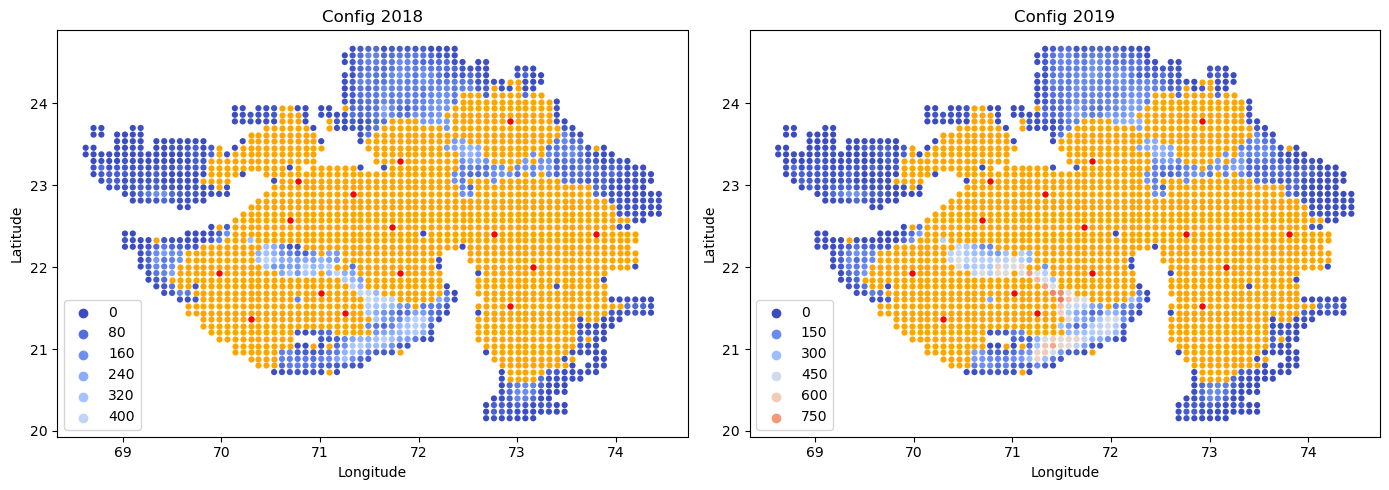

In [108]:
plot_map(dfcluster, used_2019, group_dict_2019)

## Stage-2

In [ ]:
biomass_dict_2018 = {}
for keys in group_dict.keys() :
    biomass_collected = 0
    for site in group_dict[keys]:
        biomass_collected += dfcluster.loc[dfcluster['Index']==site]['2018'].values[0]
    biomass_dict_2018[keys] = biomass_collected
    
biomass_dict_2019 = {}
for keys in group_dict_2019.keys() :
    biomass_collected = 0
    for site in group_dict[keys]:
        biomass_collected += dfcluster.loc[dfcluster['Index']==site]['2019'].values[0]
    biomass_dict_2019[keys] = biomass_collected

In [121]:
# Create depot dataframe for next step
dfdepot = pd.DataFrame(group_dict).T[['transport','biomass']].reset_index().rename(columns={'index':'depot_index'})
dfdepot['2018'] = dfdepot['biomass'].apply(lambda row: row[0])
dfdepot['2019'] = dfdepot['biomass'].apply(lambda row: row[1])
dfdepot.drop(columns=['biomass','transport'],inplace=True)

In [ ]:
from ortools.linear_solver import pywraplp

# Initialize data and decision variable
Depot = dfdepot['depot_index'].tolist()
Refinery = dfbio_long['Index'].apply(lambda row: row).unique()
Years = ['2018','2019']
Pellets = dfdepot.set_index('depot_index').to_dict()
Cap = 100000

solver = pywraplp.Solver.CreateSolver('SCIP')

# Create use_refinery variables
use_refinery = {}
for k in Refinery:
    use_refinery[k] = solver.BoolVar(f"Use Refinery {k}")

# Create assign_refinery variables
assign_refinery = {}
for j in Depot:
    for k in Refinery:
        for y in Years:
            assign_refinery[(j, k, y)] = solver.BoolVar(f"Assign Refinery ({j}, {k}, {y})")

# Define transport cost
trans_cost = sum(sum(dfdist[str(k)][int(j)] * (Pellets[y][j]) * assign_refinery[(j, k, y)] for j in Depot for k in Refinery) for y in Years)

# Define underutilization cost
under_cost = sum(sum(Cap*use_refinery[k]-sum((Pellets[y][j])*assign_refinery[j,k,y] for j in Depot) for k in Refinery) for y in Years)

# Overall cost
objective = trans_cost * 0.001 + under_cost
solver.Minimize(objective)

# Constraints
for y in Years :
    for k in Refinery :
        assignment_sum = sum(assign_refinery[j,k,y] for y in Years)
        solver.Add(assignment_sum == len(Years) * assign_refinery[(j, k, Years[0])])
        solver.Add(sum(Pellets[y][j]*assign_refinery[j,k,y] for j in Depot) - Cap*use_refinery[k] <= 0)

for y in Years :
    for j in Depot :
        solver.Add(sum(assign_refinery[j,k,y] for k in Refinery) == 1)

for y in Years :
    for j in Depot :
        for k in Refinery :
            solver.Add(assign_refinery[j,k,y] <= use_refinery[k])

solver.Add(sum(use_refinery.values()) >= 3)
solver.Add(sum(use_refinery.values()) <= 5)

In [ ]:
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print("Solution status: Optimal")
else:
    print("Solution status: Not optimal")

print("Total costs:", solver.Objective().Value())

for k in Refinery:
    if (use_refinery[k].solution_value()>0):
        print(f"use_refinery[{k}] =", use_refinery[k].solution_value())
    
for j in Depot:
    for k in Refinery:
        for y in Years:
            if (assign_refinery[(j, k, y)].solution_value()>0):
                print(f"assign_refinery[{j}, {k}, {y}] =", assign_refinery[(j, k, y)].solution_value())

In [122]:
centers = list(group_dict.keys())

In [123]:
# Initialize data and decision variable
Depot = centers
Refinery = dfcluster['Index'].tolist()
Years = ['2018','2019']
pellets = dfdepot.set_index('depot_index').to_dict()
Cap = 100000

prob = LpProblem("Shell.AI", LpMinimize)

# use_refinery will be 1 if refinery k is opened and 0 if not for every location
use_refinery = LpVariable.dicts("Use Refinery", Refinery, 0, 1, LpBinary)
# assign_refinery will be 1 if depot j is collected by refinery k
assign_refinery = LpVariable.dicts("Assign Refinery", [(j,k,y) for j in Depot for k in Refinery for y in Years], 0, 1, LpBinary)

# Define transport objective function
trans_cost = lpSum(
    lpSum(
        dfdist[str(k)][int(j)]*(pellets[y][j])*assign_refinery[j,k,y] for j in Depot for k in Refinery
        ) for y in Years
    )
# Define underutilization objective function
under_cost = lpSum(
    lpSum(
        Cap*use_refinery[k] - lpSum(
            (pellets[y][j])*assign_refinery[j,k,y] for j in Depot
            ) for k in Refinery
        ) for y in Years
    )
# Define overall costs
prob += trans_cost*0.001 + under_cost

# Constraints
for y in Years :
    for k in Refinery :
        prob += lpSum(pellets[y][j]*assign_refinery[j,k,y] for j in Depot) - Cap*use_refinery[k] <= 0

for y in Years :
    for j in Depot :
        prob += lpSum(assign_refinery[j,k,y] for k in Refinery) == 1

for y in Years :
    for j in Depot :
        for k in Refinery :
            prob += assign_refinery[j,k,y] <= use_refinery[k]

for j in Depot :
    for k in Refinery :
        assignment_sum = lpSum(assign_refinery[j,k,y] for y in Years)
        prob += assignment_sum == len(Years) * assign_refinery[(j, k, Years[0])]

prob += lpSum(use_refinery.values()) == 4

In [124]:
# Solve the problem
prob.solve(PULP_CBC_CMD(timeLimit=600))

# Print objective value
print("Objective value:", prob.objective.value())
print("Transport costs:", trans_cost.value()*0.001)
print("Under util costs:", under_cost.value())

# Print variables with positive values and their values
# for v in prob.variables():
#     if v.varValue > 0:
#         print(f"{v.name}: {v.varValue}")

Objective value: 238707.46458349994
Transport costs: 45530.464583500005
Under util costs: 193177.0


In [125]:
# Use the result to create assign dict for refinery-depot network and use list to store used index for refinery 
assign = {}
use = []
for v in prob.variables():
    if v.varValue > 0:
        line = v.name
        if line.startswith('Assign_Refinery_') :
            key = int(line.split(',_')[1])
            value = int(line.split(',_')[0].split('(')[1])
            if line.split(',_')[2].split("'")[1] == '2018': 
                assign[value] = key
        else :
            use.append(int(line.split('_')[2]))

In [126]:
# Calculate the total costs
total_transport = sum_transport + trans_cost.value()*0.001
total_under = sum_under + under_cost.value()
# total_forecast = np.mean(valid_err)*2*len(dfcluster)
total_cost = 0.001*total_transport + total_under

score = 100 - (80*total_cost)/500000
score

51.65228337757065

In [127]:
# Add refinery index to used location
use = [int(x) for x in use]
used += use

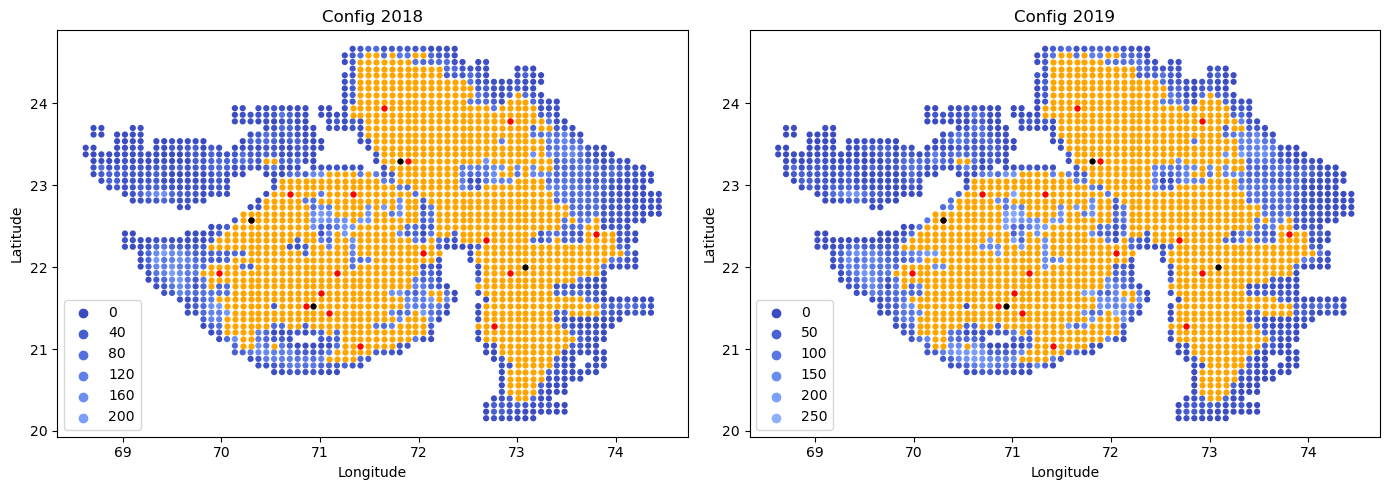

In [128]:
# Plot the whole configuration network
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.scatterplot(data=dfcluster[~dfcluster['Index'].isin(used)],x='Longitude',y='Latitude',hue='2018', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[0])
sns.scatterplot(data=dfcluster[~dfcluster['Index'].isin(used)],x='Longitude',y='Latitude',hue='2019', palette='coolwarm', hue_norm=(0,1000), s=20, linewidth=0, ax=axes[1])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(used)], x='Longitude', y='Latitude', color='orange', s=20, linewidth=0, ax=axes[0])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(used)], x='Longitude', y='Latitude', color='orange', s=20, linewidth=0, ax=axes[1])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(list(group_dict.keys()))], x='Longitude', y='Latitude', color='red', s=20, linewidth=0, ax=axes[0])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(list(group_dict.keys()))], x='Longitude', y='Latitude', color='red', s=20, linewidth=0, ax=axes[1])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(use)], x='Longitude', y='Latitude', color='black', s=20, linewidth=0, ax=axes[0])
sns.scatterplot(data=dfcluster[dfcluster['Index'].isin(use)], x='Longitude', y='Latitude', color='black', s=20, linewidth=0, ax=axes[1])
axes[0].set_title('Config 2018')
axes[1].set_title('Config 2019')
plt.tight_layout()
plt.show()

In [129]:
# Create submission dataframe
submission = pd.DataFrame(columns=['year', 'data_type', 'source_index', 'destination_index', 'value'])
submission

Empty DataFrame
Columns: [year, data_type, source_index, destination_index, value]
Index: []

In [130]:
depot_rows = {
    'year': '20182019',
    'data_type': 'depot_location',
    'source_index': list(group_dict.keys()),
    'destination_index': None,  # Empty destination_index
    'value': None  # Empty value
}
refinery_rows = {
    'year': '20182019',
    'data_type': 'refinery_location',
    'source_index': use,
    'destination_index': None,  # Empty destination_index
    'value': None  # Empty value
}

submission = pd.concat([submission,pd.DataFrame(depot_rows),pd.DataFrame(refinery_rows)],ignore_index=True)

forecast_2018 = {
    'year': '2018',
    'data_type' : 'biomass_forecast',
    'source_index' : dftest_2018['Index'],
    'destination_index': None,
    'value': dftest_2018['2018']
}
forecast_2019 = {
    'year': '2019',
    'data_type' : 'biomass_forecast',
    'source_index' : dftest_2019['Index'],
    'destination_index': None,
    'value': dftest_2019['2019']
}

submission = pd.concat([submission,pd.DataFrame(forecast_2018),pd.DataFrame(forecast_2019)],ignore_index=True)

biomass_demand = pd.DataFrame(group_dict).T.drop(columns=['transport','biomass']).reset_index()
biomass_demand = biomass_demand.explode('points').sort_values(by='points')

biomass_demand_2018 = {
    'year': '2018',
    'data_type' : 'biomass_demand_supply',
    'source_index' : biomass_demand['points'],
    'destination_index': biomass_demand['index']
}
biomass_demand_2019 = {
    'year': '2019',
    'data_type' : 'biomass_demand_supply',
    'source_index' : biomass_demand['points'],
    'destination_index': biomass_demand['index']
}

biomass_demand_2018 = pd.DataFrame(biomass_demand_2018).merge(dftest_2018[['Index','2018']], left_on='source_index', right_on='Index', how='left')
biomass_demand_2019 = pd.DataFrame(biomass_demand_2019).merge(dftest_2019[['Index','2019']], left_on='source_index', right_on='Index', how='left')

biomass_demand_2018 = biomass_demand_2018.drop(columns=['Index']).rename(columns={'2018':'value'})
biomass_demand_2019 = biomass_demand_2019.drop(columns=['Index']).rename(columns={'2019':'value'})

submission = pd.concat([submission,biomass_demand_2018,biomass_demand_2019],ignore_index=True)

pellet_demand = pd.DataFrame(list(assign.items()), columns=['source_index', 'destination_index'])

pellet_demand_2018 = {
    'year': '2018',
    'data_type' : 'pellet_demand_supply',
    'source_index' : pellet_demand['source_index'].astype(int),
    'destination_index': pellet_demand['destination_index'].astype(int)
}
pellet_demand_2019 = {
    'year': '2019',
    'data_type' : 'pellet_demand_supply',
    'source_index' : pellet_demand['source_index'].astype(int),
    'destination_index': pellet_demand['destination_index'].astype(int)
}

pellet_stock = pd.DataFrame(group_dict).T.drop(columns=['points','transport']).reset_index()
pellet_stock['pellet18'] = pellet_stock.apply(lambda row: row['biomass'][0],axis=1)
pellet_stock['pellet19'] = pellet_stock.apply(lambda row: row['biomass'][1],axis=1)
pellet_stock.drop(columns='biomass',inplace=True)

pellet_demand_2018 = pd.DataFrame(pellet_demand_2018).merge(pellet_stock[['index','pellet18']], left_on='source_index',right_on='index',suffixes=('','_'))
pellet_demand_2019 = pd.DataFrame(pellet_demand_2019).merge(pellet_stock[['index','pellet19']], left_on='source_index',right_on='index',suffixes=('','_'))

pellet_demand_2018 = pellet_demand_2018.drop(columns=['index']).rename(columns={'pellet18':'value'})
pellet_demand_2019 = pellet_demand_2019.drop(columns=['index']).rename(columns={'pellet19':'value'})

submission = pd.concat([submission,pellet_demand_2018,pellet_demand_2019],ignore_index=True)

In [131]:
submission

year             data_type source_index destination_index    value
0     20182019        depot_location         1805              None      NaN
1     20182019        depot_location          921              None      NaN
2     20182019        depot_location         1973              None      NaN
3     20182019        depot_location         1644              None      NaN
4     20182019        depot_location         2214              None      NaN
...        ...                   ...          ...               ...      ...
7382      2019  pellet_demand_supply         2214              1914  19822.0
7383      2019  pellet_demand_supply          309               606  19854.0
7384      2019  pellet_demand_supply          607               606  19919.0
7385      2019  pellet_demand_supply          921              1142  19738.0
7386      2019  pellet_demand_supply          929               606  19741.0

[7387 rows x 5 columns]

In [ ]:
# Export to csv file
submission.to_csv('Submissions/LGBM_T_C9G0L3_Same_95.csv',index=False)

In [ ]:
def get_mae(points, total_under, total_transport):
    total_cost = (100-points)*500000/80
    cost_2018 = total_cost - 0
    forecast_2018 = cost_2018 - (total_under + 0.001*total_transport)/2
    return forecast_2018/2418

In [ ]:
points = 81.512
print(f'MAE : {get_mae(points, total_under, total_transport)}')

- C9G5 L0  
S: MAE : 46.00/39.91, Mean : 126/81.28 , Mult = 0.9  
S: MAE : 39.91/37.84, Mean : 125/81.63 , Mult = 0.9

- C4 L0  
S: MAE : 38.91/48.39, Mean : 146/78.69 , Mult = 1  
S: MAE : 38.91/40.46, Mean : 131/81.01 , Mult = 0.9  
S: MAE : 38.91/38.34, Mean : 124/81.71 , Mult = 0.85  
S: MAE : 38.91/46.25, Mean : 140/79.37 , Mult = 1118  

- C16 L0  
MAE : 39.78/46.32, Mean : 143/79.44 , Mult = 1  
MAE : 39.78/39.23, Mean : 130/81.77 , Mult = 0.9  
MAE : 39.78/38.16, Mean : 126/81.07 , Mult = 0.875

- C16 L3  
MAE : 42.40/43.734, Mean : 136/79.95 , Mult = 1  

- C9 L0  
MAE : 38.79/49.173, Mean : 146/78.26 , Mult = 1  
MAE : 38.79/39.660, Mean : 131/81.73 , Mult = 0.9  
MAE : 38.79/42.878, Mean : 138/80.76 , Mult = 0.95  
MAE : 38.79/40.676, Mean : 134/81.48 , Mult = 0.92  
MAE : 38.79/36.874, Mean : 124/82.05 , Mult = 0.85  
MAE : 38.79/38.082, Mean : 127/82.02 , Mult = 0.87  
S: MAE : 32.40/52.292, Mean : 149/77.188 , Mult = 1  
S: MAE : 32.40/40.351, Mean : 126/81.516 , Mult = 0.85   
S: MAE : 32.40/41.618, Mean : 129/81.019 , Mult = 0.85,68   

In [120]:
# Check constraint number 8
x = submission[submission['data_type']=='pellet_demand_supply'].groupby(by=['year','source_index'])['value'].sum().reset_index()
y = submission[submission['data_type']=='biomass_demand_supply'].groupby(by=['year','destination_index'])['value'].sum().reset_index()

merged = pd.merge(y, x, left_on=['year', 'destination_index'], right_on=['year', 'source_index'], suffixes=('_destination', '_source'))
merged['diff'] = abs(merged['value_destination']-merged['value_source'])

merged

year  destination_index  value_destination  source_index  value_source  \
0   2018                212            17570.0           212       17570.0   
1   2018                309            18874.0           309       18874.0   
2   2018                607            18314.0           607       18314.0   
3   2018                921            14595.0           921       14595.0   
4   2018                929            17449.0           929       17449.0   
5   2018               1142            12442.0          1142       12442.0   
6   2018               1301            18812.0          1301       18812.0   
7   2018               1353            19913.0          1353       19913.0   
8   2018               1474            16745.0          1474       16745.0   
9   2018               1629            14194.0          1629       14194.0   
10  2018               1644            11954.0          1644       11954.0   
11  2018               1662            19179.0          1662       19179.0   
12  2018               1805            10311.0          1805       10311.0   
13  2018               1913            18301.0          1913       18301.0   
14  2018               1973            10070.0          1973       10070.0   
15  2018               2094            19990.0          2094       19990.0   
16  2018               2214            12509.0          2214       12509.0   
17  2019                212            19958.0           212       19958.0   
18  2019                309            19854.0           309       19854.0   
19  2019                607            19919.0           607       19919.0   
20  2019                921            19738.0           921       19738.0   
21  2019                929            19741.0           929       19741.0   
22  2019               1142            19997.0          1142       19997.0   
23  2019               1301            19860.0          1301       19860.0   
24  2019               1353            19102.0          1353       19102.0   
25  2019               1474            19749.0          1474       19749.0   
26  2019               1629            19993.0          1629       19993.0   
27  2019               1644            19837.0          1644       19837.0   
28  2019               1662            19900.0          1662       19900.0   
29  2019               1805            19920.0          1805       19920.0   
30  2019               1913            19829.0          1913       19829.0   
31  2019               1973            19803.0          1973       19803.0   
32  2019               2094            18579.0          2094       18579.0   
33  2019               2214            19822.0          2214       19822.0   

    diff  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
5    0.0  
6    0.0  
7    0.0  
8    0.0  
9    0.0  
10   0.0  
11   0.0  
12   0.0  
13   0.0  
14   0.0  
15   0.0  
16   0.0  
17   0.0  
18   0.0  
19   0.0  
20   0.0  
21   0.0  
22   0.0  
23   0.0  
24   0.0  
25   0.0  
26   0.0  
27   0.0  
28   0.0  
29   0.0  
30   0.0  
31   0.0  
32   0.0  
33   0.0